# ART HopSkipJump Attack

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import imagenet_stubs
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Dense, Flatten
from keras.models import Model
import keras.backend as k
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.classifiers import KerasClassifier
from art.attacks import HopSkipJump
from art.utils import to_categorical

Using TensorFlow backend.


# Model Definition

In [2]:
mean_imagenet = np.zeros([224, 224, 3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, 1))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Get Target and Init Images

Target image is:  105


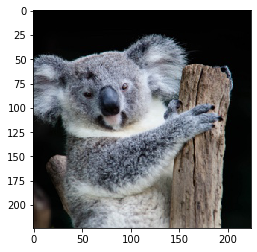

Init image is:  866


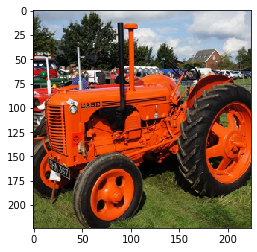

In [3]:
target_image_name = 'koala.jpg'
init_image_name = 'tractor.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 224))
        target_image = image.img_to_array(target_image)
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 224))
        init_image = image.img_to_array(init_image)

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image]))[0]))
plt.imshow(target_image.astype(np.uint))
plt.show()
print("Init image is: ", np.argmax(classifier.predict(np.array([init_image]))[0]))
plt.imshow(init_image.astype(np.uint))
plt.show()

# HopSkipJump Untargeted Attack

Adversarial image at step 0. L2 error 15256.383 and class label 106.


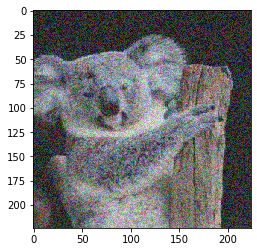

Adversarial image at step 10. L2 error 9711.338 and class label 360.


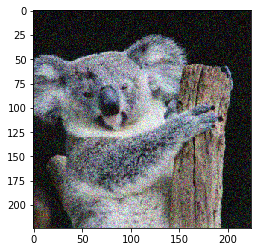

Adversarial image at step 20. L2 error 6123.4272 and class label 360.


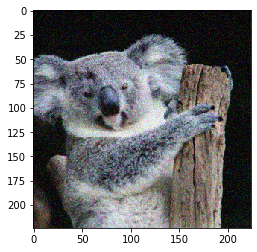

Adversarial image at step 30. L2 error 4727.389 and class label 360.


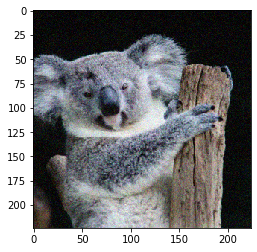

Adversarial image at step 40. L2 error 3727.2788 and class label 360.


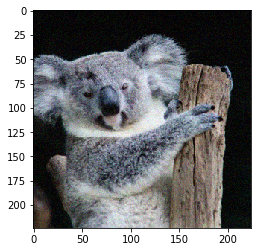

Adversarial image at step 50. L2 error 3048.0942 and class label 360.


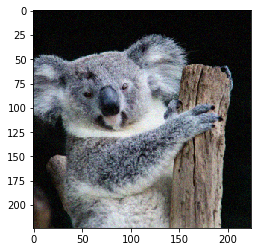

Adversarial image at step 60. L2 error 2552.769 and class label 360.


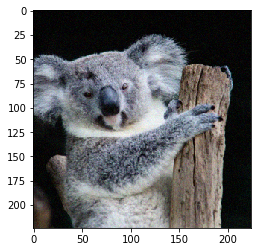

Adversarial image at step 70. L2 error 2152.3943 and class label 360.


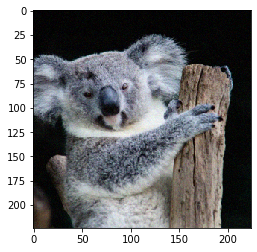

Adversarial image at step 80. L2 error 1909.402 and class label 360.


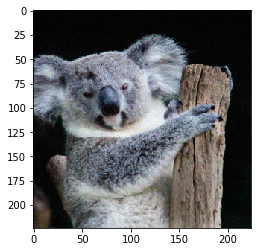

Adversarial image at step 90. L2 error 1693.9695 and class label 360.


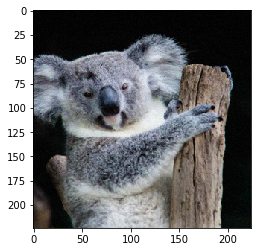

Adversarial image at step 100. L2 error 1523.455 and class label 360.


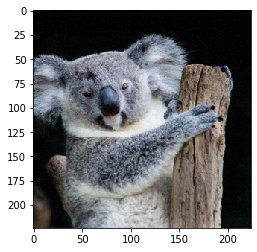

Adversarial image at step 110. L2 error 1377.4495 and class label 360.


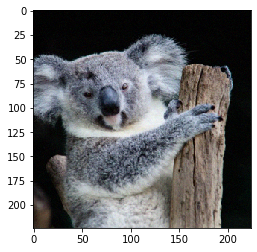

Adversarial image at step 120. L2 error 1256.4886 and class label 360.


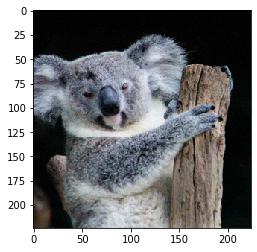

Adversarial image at step 130. L2 error 1164.8766 and class label 360.


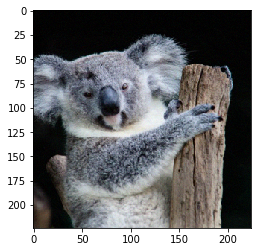

Adversarial image at step 140. L2 error 1078.9745 and class label 360.


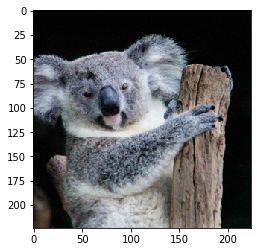

Adversarial image at step 150. L2 error 1006.386 and class label 360.


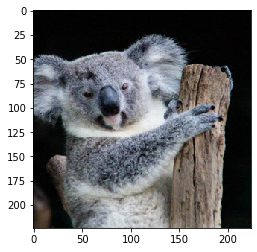

Adversarial image at step 160. L2 error 944.8917 and class label 360.


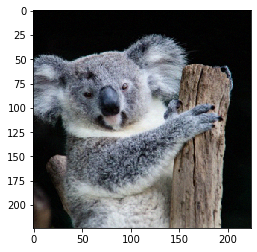

Adversarial image at step 170. L2 error 886.3489 and class label 360.


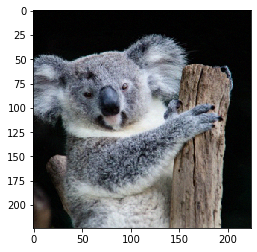

Adversarial image at step 180. L2 error 839.71844 and class label 360.


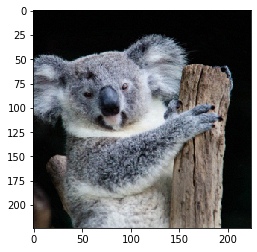

Adversarial image at step 190. L2 error 794.1285 and class label 360.


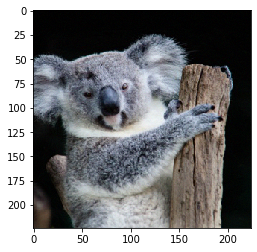

In [4]:
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None
for i in range(20):
    x_adv = attack.generate(x=np.array([target_image]), x_adv_init=x_adv, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step

# HopSkipJump Targeted Attack

Adversarial image at step 0. L2 error 44399.297 and class label 866.


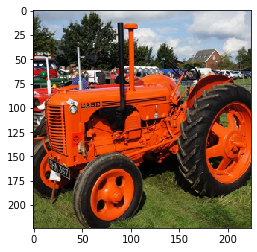

Adversarial image at step 10. L2 error 15955.264 and class label 866.


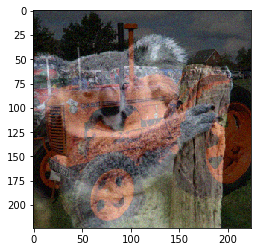

Adversarial image at step 20. L2 error 14897.013 and class label 866.


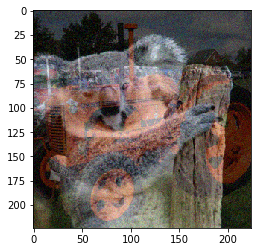

Adversarial image at step 30. L2 error 12185.588 and class label 866.


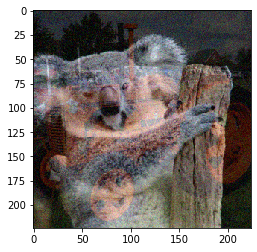

Adversarial image at step 40. L2 error 10059.957 and class label 866.


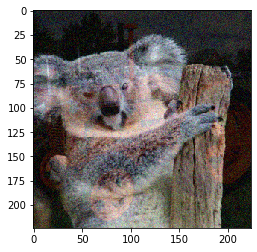

Adversarial image at step 50. L2 error 8130.5273 and class label 866.


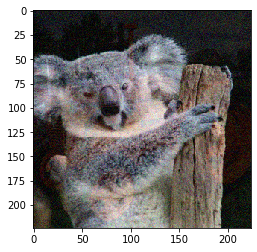

Adversarial image at step 60. L2 error 6687.649 and class label 866.


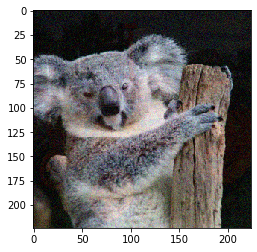

Adversarial image at step 70. L2 error 5793.0522 and class label 866.


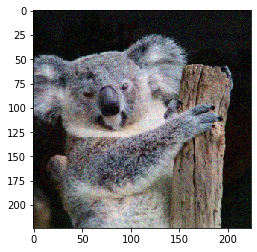

Adversarial image at step 80. L2 error 5058.391 and class label 866.


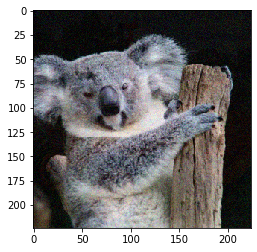

Adversarial image at step 90. L2 error 4363.3438 and class label 866.


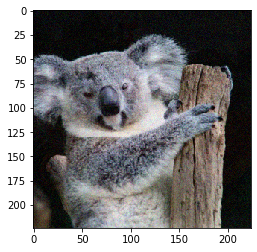

Adversarial image at step 100. L2 error 3946.2676 and class label 866.


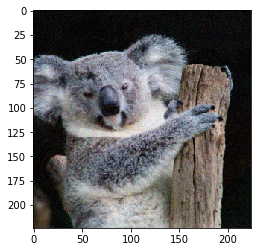

Adversarial image at step 110. L2 error 3519.5178 and class label 866.


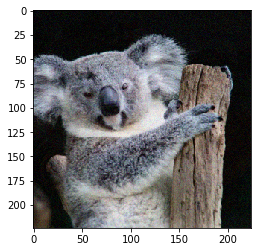

Adversarial image at step 120. L2 error 3128.209 and class label 866.


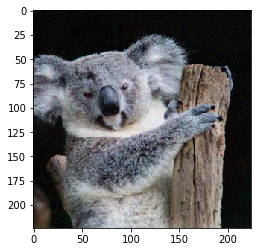

Adversarial image at step 130. L2 error 2780.4348 and class label 866.


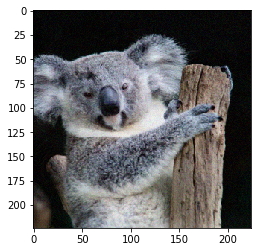

Adversarial image at step 140. L2 error 2482.2158 and class label 866.


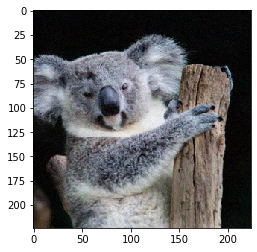

Adversarial image at step 150. L2 error 2261.923 and class label 866.


Adversarial image at step 160. L2 error 2081.6926 and class label 866.


Adversarial image at step 170. L2 error 1922.36 and class label 866.


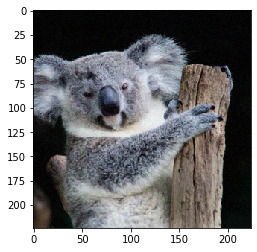

Adversarial image at step 180. L2 error 1788.6743 and class label 866.


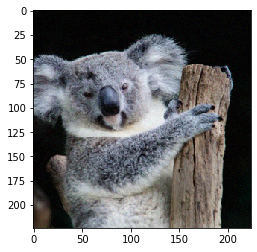

Adversarial image at step 190. L2 error 1661.3418 and class label 866.


In [5]:
attack = HopSkipJump(classifier=classifier, targeted=True, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = np.array([init_image])
for i in range(20):
    x_adv = attack.generate(x=np.array([target_image]), y=to_categorical([866], 1000), x_adv_init=x_adv, resume=True)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step

# Unsquared Images

HopSkipJump attack supports inputs of unsquared images. The code in the following cell describes an example of creating a Resnet50-based classifier to attack unsquared images.

In [8]:
# Adjust image shape here
image_shape = (224, 150)

mean_imagenet = np.zeros(tuple(list(image_shape) + [3]))
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)

model = ResNet50(weights='imagenet', input_shape=tuple(list(image_shape) + [3]), include_top=False)

def _kr_initialize(_, dtype=None):
    return k.variable(value=np.random.randn(np.prod(list(model.output.shape)[1:]).value, 1000))

head = model.output
head = Flatten()(head)
head = Dense(1000, kernel_initializer=_kr_initialize, bias_initializer=keras.initializers.Zeros())(head)
new_model = Model(inputs=model.input, outputs=head)

classifier = KerasClassifier(clip_values=(0, 255), model=new_model, preprocessing=(mean_imagenet, 1))
# Then call classifier.fit() to train the new weights

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
